### L'exploration naïve du jeu de donnée "Education Statitistics" a engendré les notes se trouvant dans ce Gdoc  : 

https://docs.google.com/document/d/1Mv_imJjOkUc7bDK0-ax2srQLyelA1Lhl9Rcpwe-mUkM/edit

Le travail préliminaire se trouve dans ce notebook : 

http://localhost:8891/notebooks/Documents/GitHub/01_Formation_Data_OC/01_02/Exploration_Naive_Education_Statistics.ipynb
(AJOUTER LE LIEN HTML)


En résumé, le travail statistique va se concentrer sur le fichier "EdStatsData.csv",

se trouvant : 
'C:/Users/Antoi/Documents/01_OC_Data/01_02_Analysez des données de systèmes éducatifs/01_02_01_Education_statistics/EdStatsData.csv'

In [12]:
import os

# Récupérer le chemin du répertoire de l'utilisateur
user_home = os.path.expanduser("~")

# Joindre le chemin du dossier "Documents" au chemin de l'utilisateur
documents_path = os.path.join(user_home, "Documents")

documents_path = documents_path.replace("\\","/") 

print(documents_path)

C:/Users/Antoi/Documents


In [13]:
# Commençons par variabiliser mes 5 jeux de données en csv
A = "EdStatsCountry.csv"
B = "EdStatsCountry-Series.csv"
C = "EdStatsData.csv"
D = "EdStatsFootNote.csv"
E = "EdStatsSeries.csv"

#Première étude sur le premier jeu de données
myFile = C

# library pandas permet la manipulation et l'analyse des données
import pandas as pd

# Stockage du chemin menant aux différents jeux de données dans une chaîne de caractère
path = documents_path+"/01_OC_Data/01_02_Analysez des données de systèmes éducatifs/01_02_01_Education_statistics/"

# Lecture du csv se trouvant dans path+B et transformation en classe DataFrame de pandas
data = pd.read_csv(path+myFile)

In [15]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
print(data.shape)
len(data['Indicator Code'].unique())
len(data['Country Name'].unique())

(886930, 71)


242

Nous allons après celà tenter de sélectionner quelques indicateurs qui semblent pertinent de part leur présence.

Dans un premier temps, nous allons créer une sous population de nos individus en fonction des valeurs présentes.


In [21]:
# Ajout d'une colonne à notre dataframe contenant le nombre de NaN

# Définir une fonction qui prend une ligne et compte le nombre de NaN
def compter_nan(ligne):
    return ligne.isna().sum()

#Appliquer la fonction à chaque ligne de ma dataFrame en utilisant apply
data['nombre_nan'] = data.apply(compter_nan, axis=1)


Text(0.5, 1.0, 'Nombre de ligne contenant des valeurs manquantes')

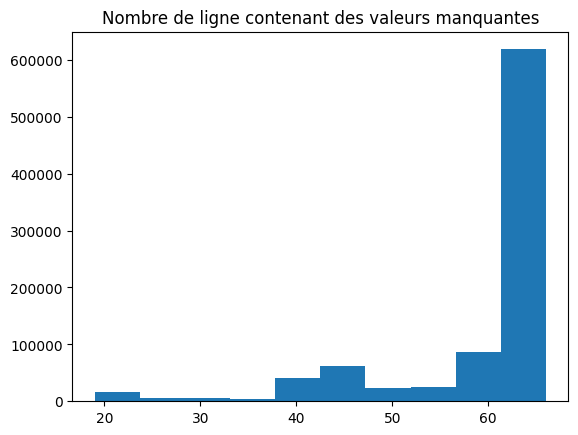

In [309]:
#Réprensation simple du nombre de NaN

import matplotlib.pyplot as plt
plt.hist(data['nombre_nan'])
plt.title("Nombre de ligne contenant des valeurs manquantes")

#### Commentaire

_Sur près de 900'000 lignes, env. 600'000 possèdent plus de 60 valeurs manquantes sur 71 colonnes_


(array([13914.,  2581.,  2227.,  2121.,  1869.,  2261.,  2084.,  1868.,
         2539., 28800.]),
 array([19. , 21.1, 23.2, 25.3, 27.4, 29.5, 31.6, 33.7, 35.8, 37.9, 40. ]),
 <BarContainer object of 10 artists>)

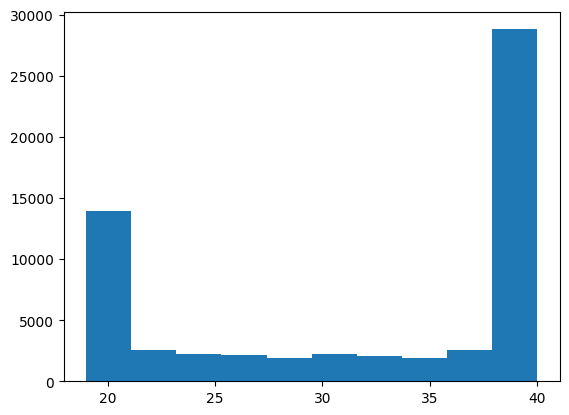

In [24]:
#Réprensation zoomée du nombre de NaN
import matplotlib.pyplot as plt
plt.hist(data['nombre_nan'][data['nombre_nan']<41])

(array([13914., 16495., 18722., 20843., 22712., 24973., 27057., 28925.,
        31464., 60264.]),
 array([19. , 21.1, 23.2, 25.3, 27.4, 29.5, 31.6, 33.7, 35.8, 37.9, 40. ]),
 <BarContainer object of 10 artists>)

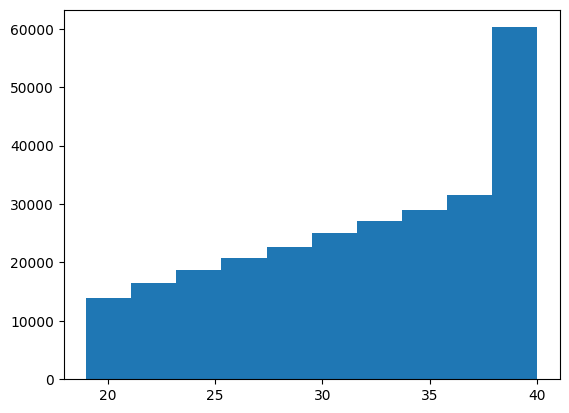

In [54]:
#Réprensation zoomée du nombre de NaN cumulé
import matplotlib.pyplot as plt
plt.hist(data['nombre_nan'][data['nombre_nan']<41], cumulative=True)

### Commentaire 

_Si l'on supprime toutes les lignes contenants plus de 41 valeurs manquantes, nous supprimerons env. 60'000 lignes. Soit moins de 10 % des lignes._

In [84]:
data['nombre_nan'].describe()

count    886930.000000
mean         60.269896
std          10.133759
min          19.000000
25%          57.000000
50%          66.000000
75%          66.000000
max          66.000000
Name: nombre_nan, dtype: float64

### commentaire
_Aucune ligne à moins de 19 valeurs manquantes_

In [373]:
#Création d'une sous population 

pctIndicateurGarde = []
pctPaysGarde = []
nbNanGarde = []
nbNanDescribe = data['nombre_nan'].describe().reset_index()
nbNanMax = int(nbNanDescribe[nbNanDescribe["index"]=="max"]['nombre_nan'])


for ii in range(nbNanMax) : 

    seuilDeNan = ii
    sousPopulation = data.loc[data['nombre_nan']<seuilDeNan,:]
    #display(sousPopulation)
    pctIndicateurGarde.append((len(sousPopulation['Indicator Code'].unique())/len(data['Indicator Code'].unique())))
    pctPaysGarde.append((len(sousPopulation['Country Code'].unique())/len(data['Country Code'].unique())))
    nbNanGarde.append(ii)    



Text(0.5, 1.0, 'Pourcentage en fonction du nombre de Nan par ligne.')

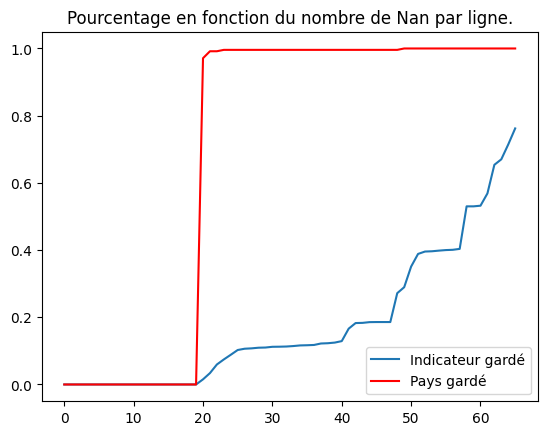

In [380]:
plt.plot(nbNanGarde[:67],pctIndicateurGarde[:67],label="Indicateur gardé")
plt.plot(nbNanGarde[:67],pctPaysGarde[:67],color='red',label = "Pays gardé")
plt.legend()
plt.title("Pourcentage en fonction du nombre de Nan par ligne.")

### Commentaire

_A partir du moment où le nombre de valeurs manquantes est inférieurs à env. 20 plus aucun pays no indicateur ne sont présetns dans la base._

_Le graphe du dessus nous indique bien qu'il s'agit de 0._

Text(0.5, 1.0, 'Pourcentage en fonction du nombre de Nan')

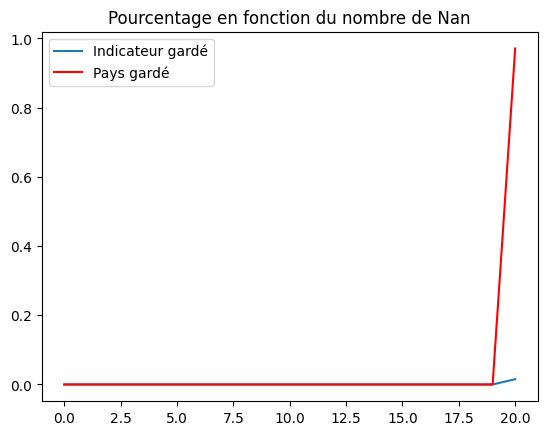

In [381]:
plt.plot(nbNanGarde[:21],pctIndicateurGarde[:21],label="Indicateur gardé")
plt.plot(nbNanGarde[:21],pctPaysGarde[:21],color='red',label = "Pays gardé")
plt.legend()
plt.title("Pourcentage en fonction du nombre de Nan")

In [382]:
sousPopulation = data.loc[data['nombre_nan']<21,:]
print(sousPopulation.shape)
len(sousPopulation['Indicator Code'].unique())


(10622, 71)


124

### Commentaire 

_En ne sélectionnant que les lignes contenant moins de 21 valeurs manquantes, notre sous population contenant encore 124 indicateurs sur plus de 3'000 et tous les pays sont représentés_

In [377]:
nb_presence_indicateur = pd.DataFrame({'Indicator Code':sousPopulation['Indicator Code'].unique(),'Nombre':range(len(sousPopulation['Indicator Code'].unique()))})
nb_presence_indicateur


for ii in sousPopulation['Indicator Code'].unique() : 
    nb_presence_indicateur.loc[:,"Nombre"][nb_presence_indicateur["Indicator Code"]==ii] = sousPopulation.loc[:,'Indicator Code'][sousPopulation['Indicator Code']==ii].count()
    
nb_presence_indicateur

C:\Users\Antoi\AppData\Local\Temp\ipykernel_18568\2131138969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_presence_indicateur.loc[:,"Nombre"][nb_presence_indicateur["Indicator Code"]==ii] = sousPopulation.loc[:,'Indicator Code'][sousPopulation['Indicator Code']==ii].count()


,Indicator Code,Nombre
0,SP.POP.1564.TO.ZS,216
1,NY.GDP.MKTP.KD,128
2,NY.GDP.MKTP.CD,132
3,NY.GDP.PCAP.KD,128
4,NY.GDP.PCAP.CD,131
...,...,...
119,UIS.THDUR.0,201
120,SE.PRM.DURS,200
121,SE.SEC.DURS,199
122,SE.SEC.DURS.UP,199


## Tentons de ne garder que les indicateurs présents plus de X fois et voyons combien de pays cela supprime.

In [385]:
#Nombre de fois où est présent chaque indicateur de notre sous population  
NombreIndicateurPresent = sousPopulation['Indicator Code'].value_counts().reset_index()
print(NombreIndicateurPresent.describe())
display(NombreIndicateurPresent)

       Indicator Code
count      124.000000
mean        85.661290
std         91.286727
min          1.000000
25%          5.000000
50%          9.000000
75%        189.000000
max        229.000000


,index,Indicator Code
0,SP.POP.TOTL,229
1,SP.POP.GROW,229
2,SP.POP.1564.TO.ZS,216
3,SP.POP.TOTL.MA.ZS,211
4,SP.POP.TOTL.FE.ZS,211
...,...,...
119,SE.PRE.TCHR,1
120,SE.PRM.CMPT.FE.ZS,1
121,SE.SEC.TCHR.FE.ZS,1
122,SE.SEC.CMPT.LO.ZS,1


In [389]:
#Quel indicateur est présent pour tous les pays ? 

filtreParPresenceIndicateur = NombreIndicateurPresent.loc[NombreIndicateurPresent["Indicator Code"]>130]
filtreParPresenceIndicateur.columns = ['Indicator Code','Nombre de presence dans ma sousPop']
print(filtreParPresenceIndicateur)
#Voyons le nombre de pays restant dans ma sousPopulation filtré par le nombre de Nan

merge_df = pd.merge(sousPopulation,filtreParPresenceIndicateur,on='Indicator Code',how="right")

display(merge_df)



         Indicator Code  Nombre de presence dans ma sousPop
0           SP.POP.TOTL                                 229
1           SP.POP.GROW                                 229
2     SP.POP.1564.TO.ZS                                 216
3     SP.POP.TOTL.MA.ZS                                 211
4     SP.POP.TOTL.FE.ZS                                 211
5     SP.POP.0014.TO.ZS                                 211
6        SP.POP.0014.TO                                 210
7     SP.POP.TOTL.MA.IN                                 210
8     SP.POP.TOTL.FE.IN                                 210
9        SP.POP.1564.TO                                 210
10    SP.POP.1564.FE.IN                                 210
11    SP.POP.1564.MA.IN                                 210
12    SP.POP.0014.MA.IN                                 210
13    SP.POP.0014.FE.IN                                 210
14          UIS.THDUR.0                                 201
15          SE.PRM.DURS                 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,nombre_nan,Nombre de presence dans ma sousPop
0,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.288581e+09,1.322182e+09,1.354003e+09,1.384272e+09,1.414385e+09,1.441542e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,229
1,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.115427e+09,1.146090e+09,1.175063e+09,1.203125e+09,1.229693e+09,1.253833e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,229
2,Euro area,EMU,"Population, total",SP.POP.TOTL,2.874162e+08,2.890325e+08,2.910407e+08,2.929618e+08,2.946894e+08,2.962447e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,229
3,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,7.379482e+08,7.436074e+08,7.498159e+08,7.558680e+08,7.617013e+08,7.673326e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,229
4,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,3.186996e+08,3.222349e+08,3.257621e+08,3.292678e+08,3.327896e+08,3.363302e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,United Kingdom,GBR,GDP per capita (current US$),NY.GDP.PCAP.CD,2.347544e+03,2.649802e+03,3.030433e+03,3.426276e+03,3.665863e+03,4.299746e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,131
9415,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,5.246884e+03,5.623444e+03,6.109926e+03,6.741332e+03,7.242441e+03,7.820065e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,131
9416,Uruguay,URY,GDP per capita (current US$),NY.GDP.PCAP.CD,7.605860e+02,9.960927e+02,7.759934e+02,1.404742e+03,1.448339e+03,1.250201e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,131
9417,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,4.373065e+02,3.907129e+02,4.274629e+02,4.900664e+02,6.510935e+02,5.274433e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,131


### Commentaire

_Au dessus, nous avons une data frame filtrée une première fois par les valeurs manquantes (<21) et une seconde fois par le nombre de présence de chaque indicateur (>130)_ 

# Voyons maintenant à quoi corrrespondent ces indicateurs 

### Croisons ces indicateurs avec la table contenant les descriptions 

In [392]:
# Definition des donner via la table "EdStatsSeries.csv"

# Commençons par variabiliser mes 5 jeux de données en csv
A = "EdStatsCountry.csv"
B = "EdStatsCountry-Series.csv"
C = "EdStatsData.csv"
D = "EdStatsFootNote.csv"
E = "EdStatsSeries.csv"

#récupéaration des définition des indicateurs
myFile = E

# Stockage du chemin menant aux différents jeux de données dans une chaîne de caractère
path = documents_path+"/01_OC_Data/01_02_Analysez des données de systèmes éducatifs/01_02_01_Education_statistics/"

# Lecture du csv se trouvant dans path+B et transformation en classe DataFrame de pandas
dataDefinition = pd.read_csv(path+myFile)

### Petite analyse du jeu 

In [414]:
print("\nLes colonnes sont les suivantes \n \n ",dataDefinition.columns)
print("\n\n \n Les ",len(dataDefinition['Topic'].unique())," différentes modalités de Topic sont les suivantes  : \n\n\n ", dataDefinition['Topic'].unique())



Les colonnes sont les suivantes 
 
  Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


 
 Les  37  différentes modalités de Topic sont les suivantes  : 


  ['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 '

### Croisons avec notre sous population doublement filtrée (NaN et nombre de présence indicateurs)

In [418]:
#Pour rappel notre df est la suivante
filtreParPresenceIndicateur

'''merge pour obtenir les Noms des indicateurs en repassant par la table de base 
car les "Indicator Code" ne sont pas dans la table de descriptions'''

indicatorName = pd.merge(data,filtreParPresenceIndicateur,on="Indicator Code",how="right")['Indicator Name'].reset_index()
indicatorName

,index,Indicator Name
0,0,"Population, total"
1,1,"Population, total"
2,2,"Population, total"
3,3,"Population, total"
4,4,"Population, total"
...,...,...
11853,11853,GDP per capita (current US$)
11854,11854,GDP per capita (current US$)
11855,11855,GDP per capita (current US$)
11856,11856,GDP per capita (current US$)


In [416]:
#Création de la sous DF de la table "descriptions des variables" ne tenont compte que des indicateur sélectionnés

myDF= pd.DataFrame(indicatorName['Indicator Name'].unique())
myDF.columns = ['Indicator Name']
myDF
informationsSurLesIndicateursGardes = pd.merge(myDF,dataDefinition,on="Indicator Name",how="left")

informationsSurLesIndicateursGardes

,Indicator Name,Series Code,Topic,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,"Population, total",SP.POP.TOTL,Health: Population: Structure,NaN,Total population is based on the de facto defi...,NaN,Annual,NaN,NaN,Sum,...,NaN,Relevance to gender indicator: disaggregating ...,(1) United Nations Population Division. World ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population growth (annual %),SP.POP.GROW,Health: Population: Dynamics,Annual population growth rate. Population is b...,Annual population growth rate for year t is th...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,Derived from total population. Population sour...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Population, ages 15-64 (% of total)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Population, male (% of total)",SP.POP.TOTL.MA.ZS,Health: Population: Structure,NaN,Male population is the percentage of the popul...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,World Bank staff estimates based on age/sex di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,Health: Population: Structure,NaN,Female population is the percentage of the pop...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,World Bank staff estimates based on age/sex di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Population, ages 0-14 (% of total)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Population, ages 0-14, total",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Population, male",SP.POP.TOTL.MA.IN,Health: Population: Structure,NaN,Male population is based on the de facto defin...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,World Bank staff estimates using the World Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Population, female",SP.POP.TOTL.FE.IN,Health: Population: Structure,NaN,Female population is based on the de facto def...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,World Bank staff estimates using the World Ban...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Population, ages 15-64, total",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
informationsSurLesIndicateursGardes['Topic'].unique()

array(['Health: Population: Structure', 'Health: Population: Dynamics',
       nan, 'Pre-Primary', 'Primary', 'Secondary', 'Population',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'],
      dtype=object)

In [422]:
informationsSurLesIndicateursGardes['Long definition'].unique()

array(['Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.',
       'Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.',
       nan,
       'Male population is the percentage of the population that is male. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.',
       'Female population is the percentage of the population that is female. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.',
       'Male population is based on the de facto definition of population, which counts all m

### Mettons de côté ces résultats et passons au colonnes. Est-ce certaines années sont inutiles ? 


In [28]:
#Comptons le nombre de NaN sur les colonnes. 
NbNanEnColonne = data.apply(compter_nan)

<BarContainer object of 71 artists>

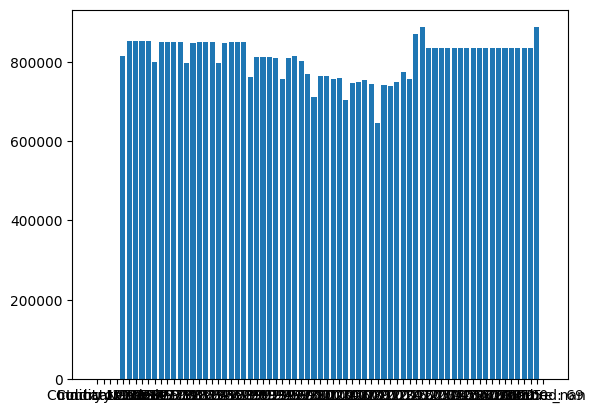

In [47]:
NbNanEnColonneDF = NbNanEnColonne.to_frame().reset_index()
NbNanEnColonneDF.columns = ['colonne', 'nb_nan']
plt.bar(NbNanEnColonneDF['colonne'],NbNanEnColonneDF['nb_nan'])



In [51]:
NbNanEnColonneDF.sort_values('nb_nan')

NbNanEnColonneDF['nb_nan'].describe()

count        71.000000
mean     752889.845070
std      213795.097157
min           0.000000
25%      757341.500000
50%      835494.000000
75%      847855.500000
max      886930.000000
Name: nb_nan, dtype: float64